<a href="https://colab.research.google.com/gist/oserikov/f430e81939ffff48cafd6377b9e67b9c/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание о векторизации текстов

В задании вам предстоит сравнить несколько методов снижения размерности
* PCA
* t-SNE

а так же попробовать осуществить тематическое моделирование методом LDA.

**Формат сдачи задания** -- указание в гуглформе ссылки на тетрадь с решением + ответ на вопросы (см. последние вопросы первой задачи) в форме. Форма появится ближе к дедлайну.

**Дедлайн** 23.59 7 октября MSK.  

ДЗ предполагает возможность получения **до 12 баллов** по десятибалльной шкале. Оценки 11 и 12 поступают в ведомость, как оценки 11 и 12.

---

Если вы уже хорошо знакомы с снижением размерности, реализуйте первую задачу, используя не Bag-of-Words векторы текстов, а эмбеддинги текстов, полученные алгоритмом на ваш выбор. 
**Если вы собираетесь решать задачу так, то, приступая, сообщите об этом @oserikov в телеграме.**

Если вы уже хорошо знакомы ещё и с векторизацией текстов эмбеддингами, напишите @oserikov для обсуждения замены первой задачи на другую.


# [6 баллов] Задача о снижении размерности




[Вот](https://drive.google.com/drive/folders/1HX5rz4UZHtbzhPguUFolOg-xm6HFc0KO?usp=sharing) корпус, однажды собранный без особенных размышлений.
Это -- корпус любительской литературы. Он был собран для забавы и непонятно, какая природа у представленных там текстов.

Вам предстоит оценить, насколько эти тексты интересны в качестве простого датасета для задачи классификации: информативны ли Bag-of-Words векторы в смысле разделения текстов по жанрам.

---

### Постановка задачи

**Задача**: взяв фанифики и два каких-то других жанра из корпуса, визуализировать их BoW-представления на плоскости.

---

Визуализацию стоит осуществлять scatter-плотом, информацию о принадлежности документа какому-то жанру стоит передавать цветом.

Количество документов, представляющих каждый жанр, стоит подобрать семплированием нужного количества элементов под доступные вычислительные ресурсы -- полный корпус точно слишком велик.

Гиперпараметры BoW-векторизатора стоит подобрать под доступные вычислительные ресурсы -- если код работает дольше часа, то стоит упростить вычислительную задачу: подобрать другие гиперпараметры векторизации или уменьшить выборку.

#### Критерии


* **1 БАЛЛ**: 
  * В выбранных документах осуществлена какая-то **стандартная предобработка текста**: удалены стоп-слова и мусорные токены (e.g. html-теги), проведена лемматизация.  
  Решение о каждой конкретной детали предобработки остаётся на усмотрение студентов: каждое нестандартное действие (e.g. отказ от лемматизации или удаление каких-то особенных токенов) стоит пояснить коротким комментарием, описывающим мотивацию.
  * Получены **Bag-of-Words векторы** документов, выбранных для исследования. 
* **1 БАЛЛ**: получена визуализация документов на плоскости **методом главных компонент** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: получена визуализация документов на плоскости методом **t-SNE** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: на полученных визуализациях **получилось передать цветом точек классы** документов; понятно, точка какого цвета относится к какому классу.


Скорее всего визуализация t-SNE и PCA заметно отличаются раскладкой точек по плоскости: один метод как будто раскладывает их вдоль двух пересекающихся прямых, за другим такого свойства скорее всего нет. Ответ на два вопроса ниже вам предстоит указать в гуглформе, сдавая задание.
* **1 БАЛЛ**: верно указано, какой метод укладывает точки примерно вдоль прямых, а какой -- нет
* **1 БАЛЛ**: предложено верное описание тому, почему у одного из методов всегда результаты располагаются вдоль некоторых прямых. 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.DataFrame(columns=['text', 'genre'])

In [3]:
import os
all_texts = []
all_genres = []
path = '/content/drive/My Drive/Colab Notebooks/amcorpus'
for folder in os.listdir(path):
  folder_path = path + '/' + folder
  for fn in os.listdir(folder_path):
    filepath = folder_path + '/' + fn
    with open(filepath, 'r') as f:
      all_texts.append(f.read())
      all_genres.append(folder)

In [4]:
df['text'] = all_texts
df['genre'] = all_genres

In [5]:
df1 = df[df['genre']=='Детская'].sample(n=100)
df2 = df[df['genre']=='Религия'].sample(n=100)
df3 = df[df['genre']=='Фанфик'].sample(n=100)

In [6]:
sample_df = pd.concat([df1, df2, df3])
sample_df = sample_df.reset_index(drop=True)
sample_df.head()

,text,genre
0,\n\n\n\n\n\n\n\n\n\n\n ...,Детская
1,\n\n\n \n ЧЕРЕПАХИН ХВОС...,Детская
2,\n\n\n\n\nАлександр Парфе\n\nПро мышку Соню\n\...,Детская
3,"\n\n \n \n\n\n\n Кажется, в 3 классе задали на...",Детская
4,\n\n \n \n\n\n\n Андрей Богдарин\n \n Весёлые ...,Детская


In [7]:
#df.to_csv('am_corpus.csv')

In [8]:
#sample_df.to_csv('am_corpus_sample.csv')

In [ ]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
#!mkdir /root/.local/bin
!cp mystem /root/.local/bin/mystem

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_ru = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from pymystem3 import Mystem
import numpy as np
import string

mystem = Mystem()

def preprocessing(texts, mystem=mystem):
    lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]
    txtpart = lol(texts, 1000)
    res = []
    for txtp in txtpart:
        alltexts = ' '.join([txt + ' brt ' for txt in txtp])
        all_words = mystem.lemmatize(alltexts)
        words = []
        for w in all_words:
          w = w.strip()
          if w not in stopwords_ru and w not in string.punctuation:
            words.append(w)
        doc = []
        for txt in words:
            if txt != '\n' and txt.strip() != '':
                if txt == 'brt':
                    res.append(doc)
                    doc = []
                else:
                    doc.append(txt)
    return res

In [12]:
preprocessing(['мама мыла раму'])

[['мама', 'мыть', 'рама']]

In [13]:
sample_df['lemmas'] = preprocessing(sample_df['text'])

In [14]:
sample_df['clean_text'] = [' '.join(lemmas) for lemmas in sample_df['lemmas']]

In [15]:
sample_df.to_csv('sample_corpus_clean.csv')

In [16]:
sample_df = pd.read_csv('sample_corpus_clean.csv')

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus_matrix = vectorizer.fit_transform(sample_df['clean_text'])

In [18]:
sample_df['vector'] = corpus_matrix

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [20]:
labels = []
genres = sample_df['genre'].unique()
for i in sample_df['genre']:
  if i==genres[0]:
    labels.append(0)
  if i==genres[1]:
    labels.append(1)
  if i==genres[2]:
    labels.append(2)

In [ ]:
import matplotlib.patches as mpatches

classes = ['A','B','C']
class_colours = ['r','b','g']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

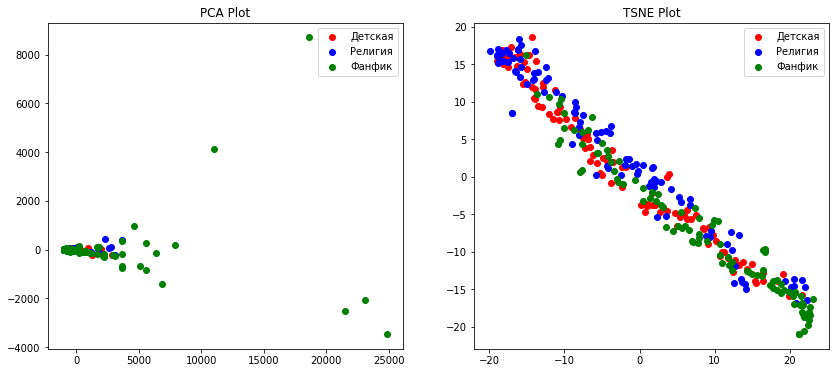

In [46]:
def plot_tsne_pca(data, labels): 
    pca = PCA(n_components=2).fit_transform(data.todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data.todense()))
    group = np.array(labels)
    cdict = {0: 'red', 1: 'blue', 2: 'green'}
    groupdict = {0: 'Детская', 1: 'Религия', 2: 'Фанфик'}
       
    idx = [i for i in range(300)]
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    for g in np.unique(group):
      ix = np.where(group == g)
      ax[0].scatter(pca[ix, 0], pca[ix, 1], c = cdict[g], label = groupdict[g])
    ax[0].legend()
    ax[0].set_title('PCA Plot')

    for g in np.unique(group):
      ix = np.where(group == g)
      ax[1].scatter(tsne[ix, 0], tsne[ix, 1], c = cdict[g], label = groupdict[g])
    ax[1].legend()
    ax[1].set_title('TSNE Plot')
    
plot_tsne_pca(corpus_matrix, labels)